In [133]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import seaborn as sns 
import matplotlib.pyplot as plt
import os


# we need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

## We need to identify the best possible model that will give the required performance

In [3]:
os.getcwd()

'C:\\Users\\ITESS'

In [4]:
os.chdir(r'F:\Data science\Machine learning\Random Forest\Credit card churn')

In [5]:
df= pd.read_csv('BankChurners.csv')

In [6]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [8]:
#CLIENTNUM: Client number. Unique identifier for the customer holding the account
 
#Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
 
#Customer_Age: Age in Years
 
#Gender: Gender of the account holder
 
#Dependent_count: Number of dependents
 
#Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
 
#Marital_Status: Marital Status of the account holder
 
#Income_Category: Annual Income Category of the account holder
 
#Card_Category: Type of Card
 
#Months_on_book: Period of relationship with the bank
 
#Total_Relationship_Count: Total no. of products held by the customer
 
#Months_Inactive_12_mon: No. of months inactive in the last 12 months
 
#Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
 
#Credit_Limit: Credit Limit on the Credit Card
 
#Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
 
#Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
 
#Total_Trans_Amt: Total Transaction Amount (Last 12 months)
 
#Total_Trans_Ct: Total Transaction Count (Last 12 months)
 
#Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
 
#Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
 
#Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

In [9]:
df.shape

(10127, 23)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [16]:
df =df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'],axis =1)

In [17]:
df =df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis =1)

In [44]:
sd = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [46]:
for column, dtype in df.dtypes.items():
    if dtype == 'object':
        print("Columns with object data type are :=" ,column)

Columns with object data type are := Attrition_Flag
Columns with object data type are := Gender
Columns with object data type are := Education_Level
Columns with object data type are := Marital_Status
Columns with object data type are := Income_Category
Columns with object data type are := Card_Category


In [20]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [52]:
#CLIENTNUM  is not required because it is unique 
df =df.drop(['CLIENTNUM'],axis =1)

In [57]:
df.duplicated().sum()

0

In [60]:
df.describe(include='object').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


# EDA

In [64]:
categorical_cols=df.select_dtypes(include='object').columns.to_list()

In [66]:
numerical_cols =df.select_dtypes(include='number').columns.to_list()

In [68]:
categorical_cols

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [73]:
#histplot for numerical data


 Customer_Age


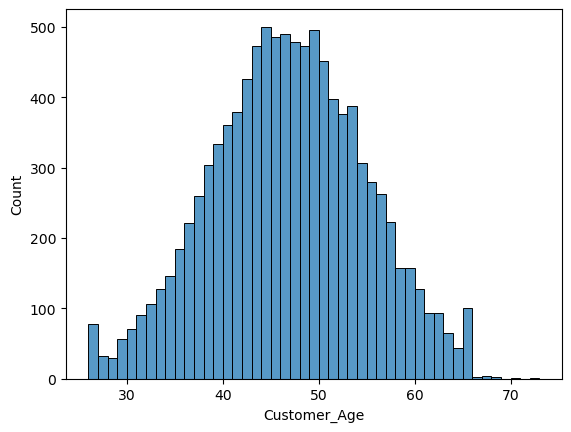


 Dependent_count


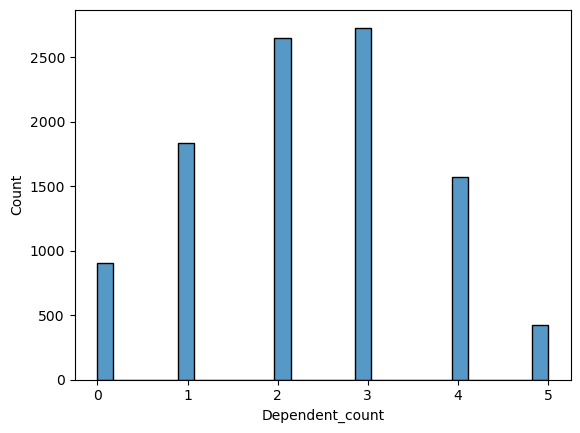


 Months_on_book


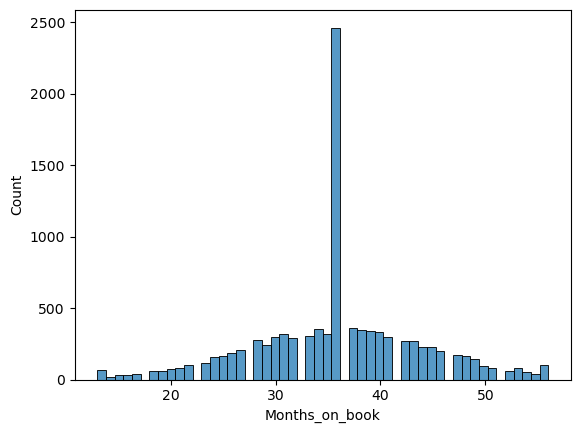


 Total_Relationship_Count


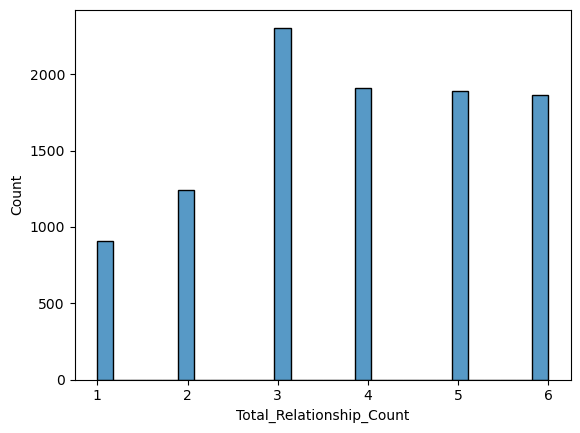


 Months_Inactive_12_mon


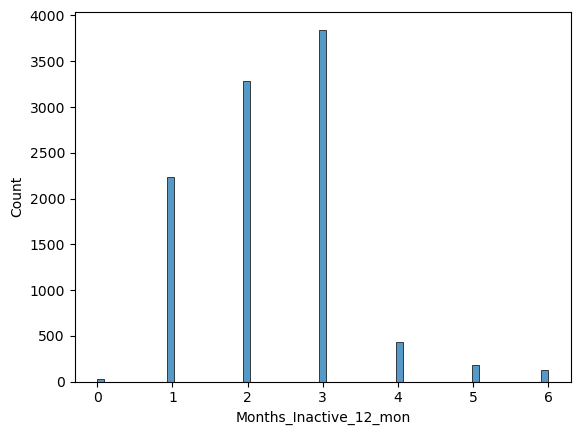


 Contacts_Count_12_mon


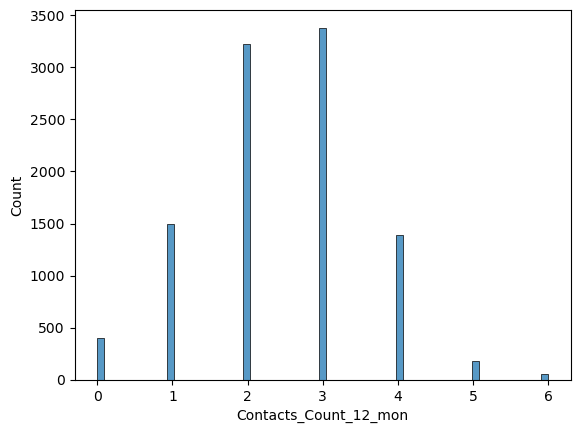


 Credit_Limit


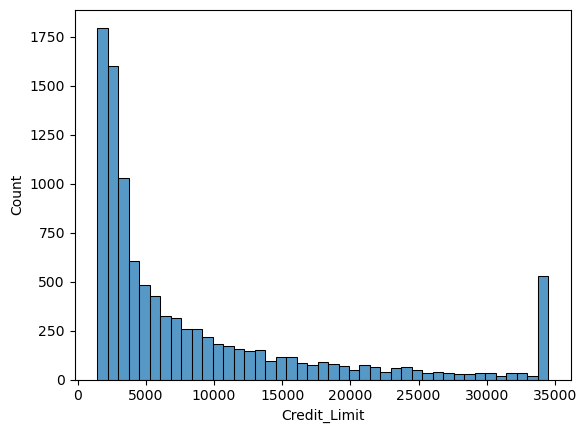


 Total_Revolving_Bal


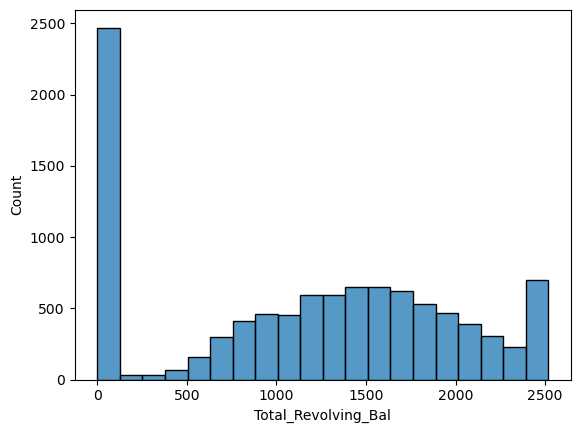


 Avg_Open_To_Buy


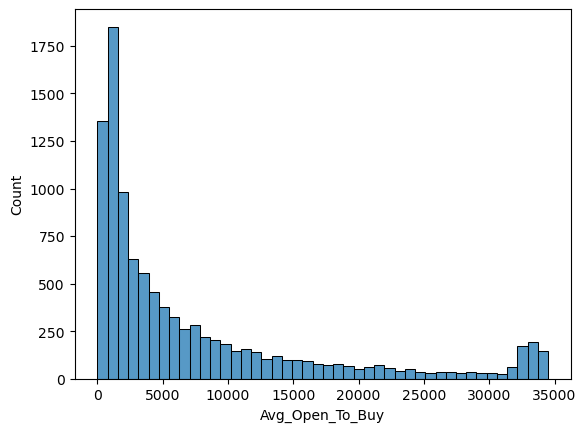


 Total_Amt_Chng_Q4_Q1


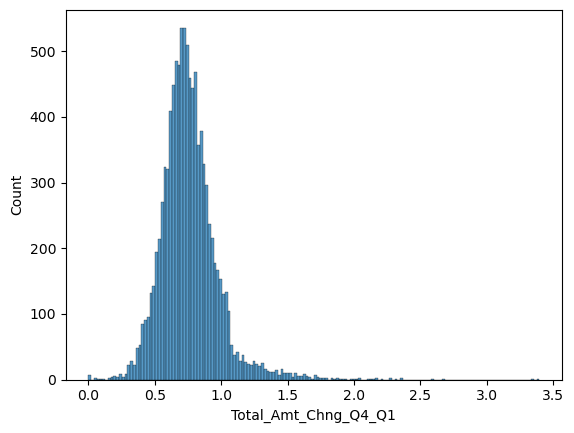


 Total_Trans_Amt


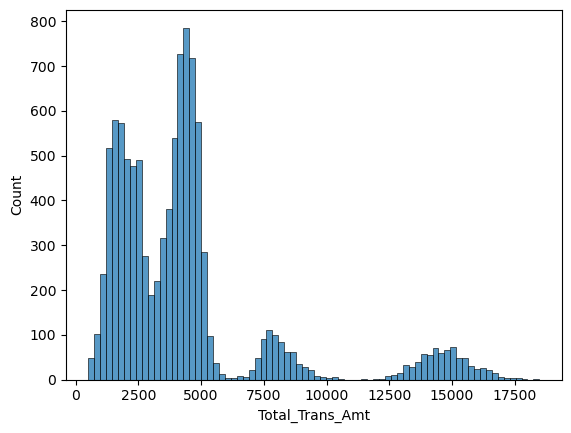


 Total_Trans_Ct


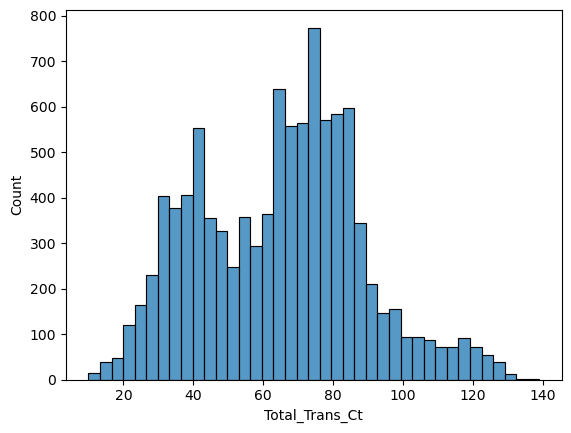


 Total_Ct_Chng_Q4_Q1


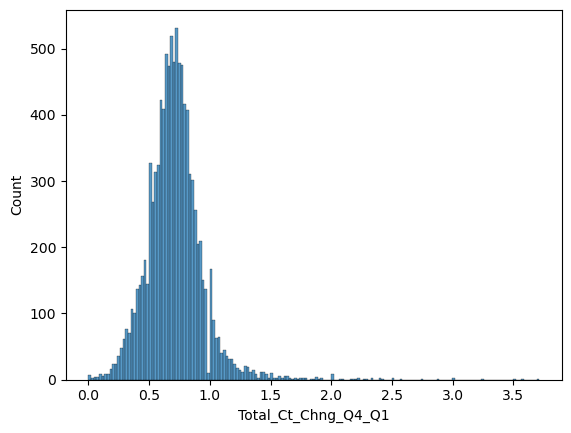


 Avg_Utilization_Ratio


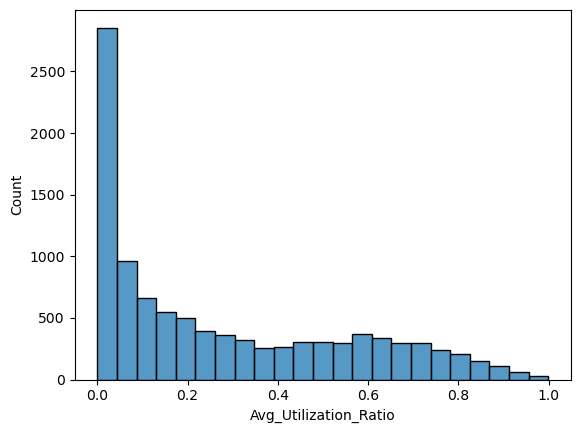

In [74]:
for i  in numerical_cols:
    print('\n',i)
    sns.histplot(data = df, x=i)
    plt.show()


 Attrition_Flag


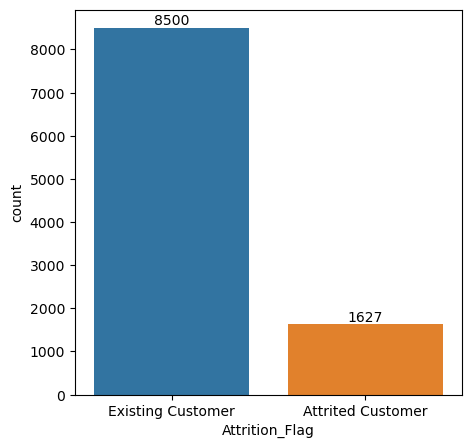


 Gender


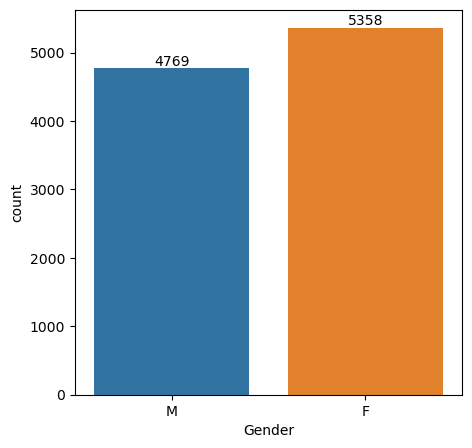


 Education_Level


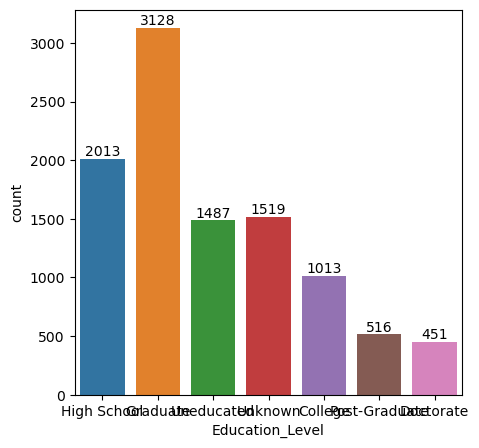


 Marital_Status


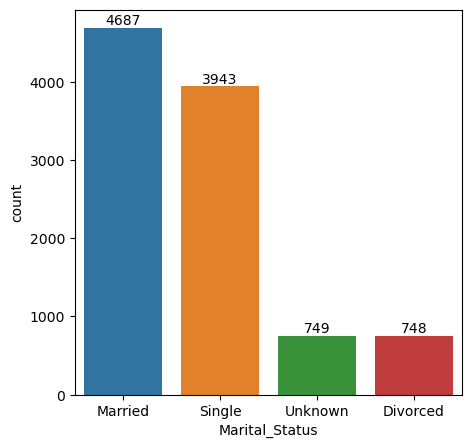


 Income_Category


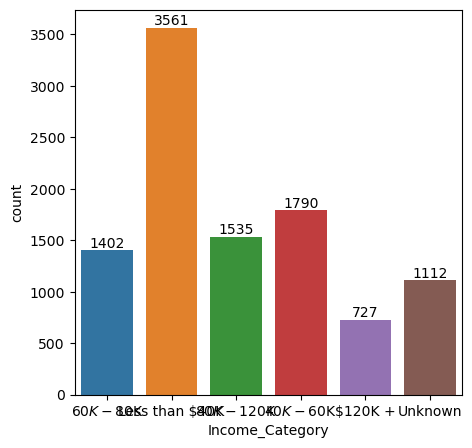


 Card_Category


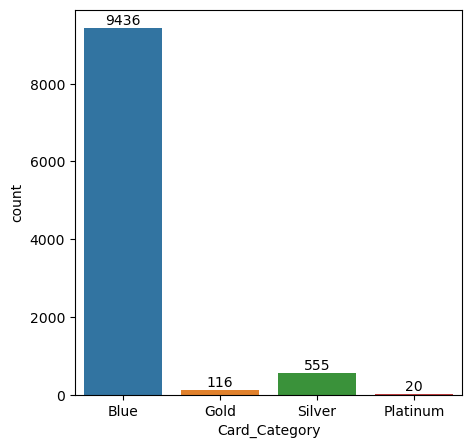

In [97]:
for i  in categorical_cols:
    print('\n',i)
    plt.figure(figsize=(5,5))
    ax =sns.countplot(data = df, x=i)
    ax.bar_label(ax.containers[0])
    df[i].value_counts(normalize=True)
    
    plt.show()

<Axes: >

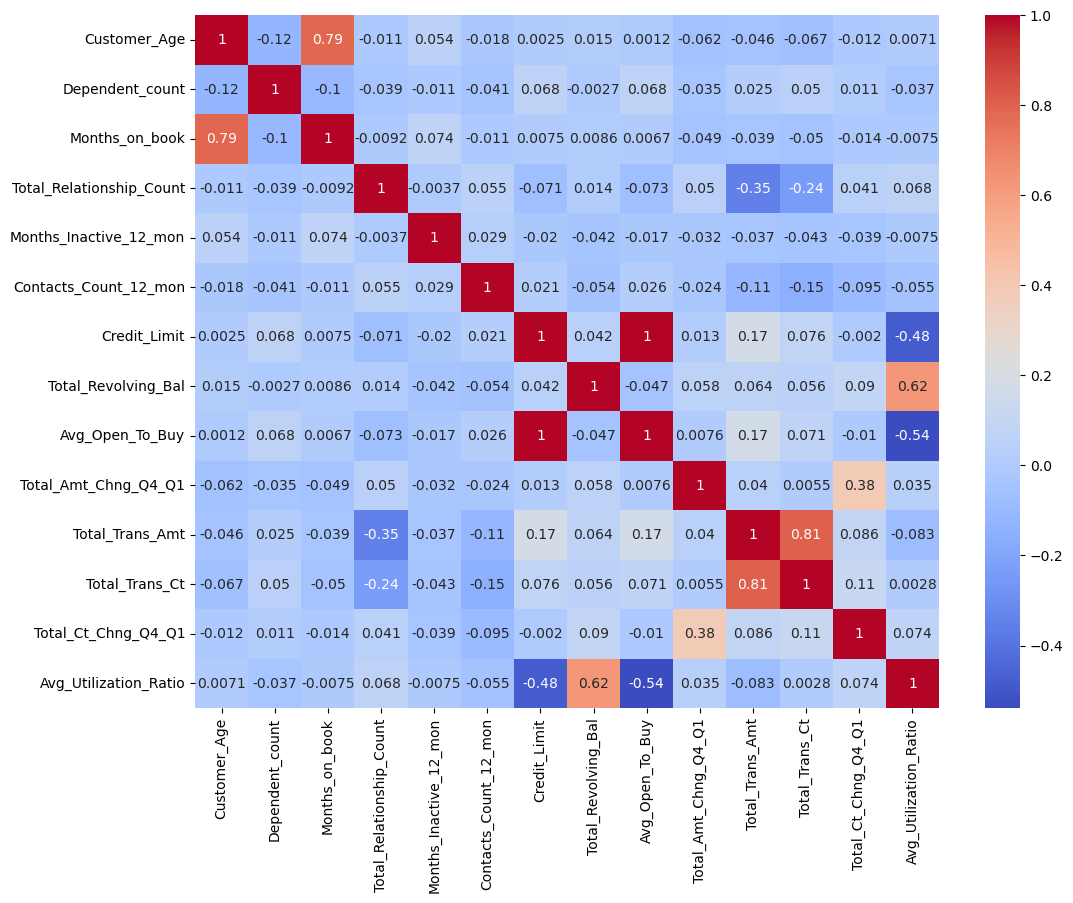

In [107]:
plt.figure(figsize=(12,9))
sns.heatmap(df[numerical_cols].corr(),annot=True,cmap='coolwarm')


In [108]:
#Bivariate analysis wrt to numerical analysis

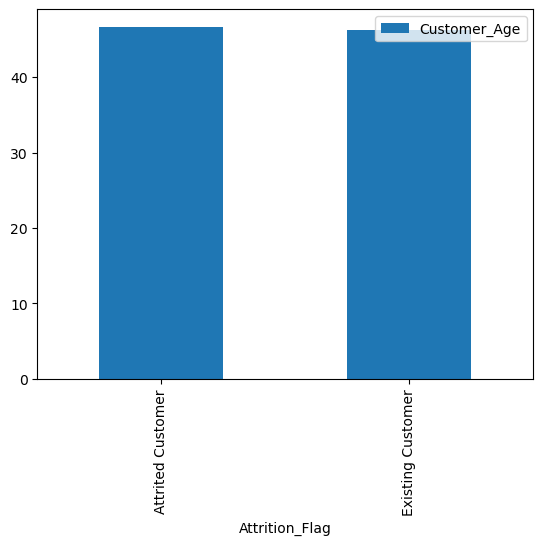

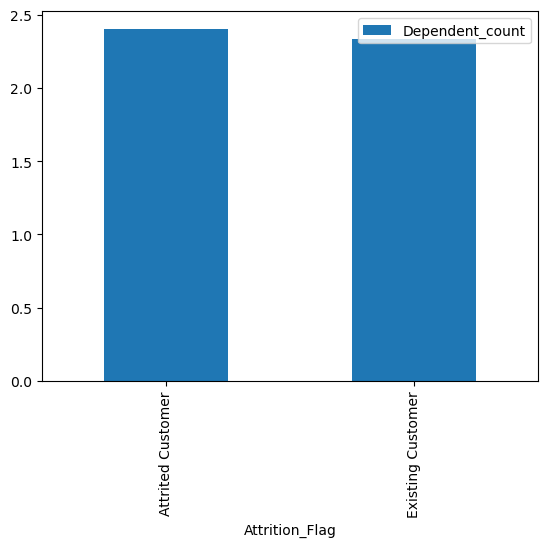

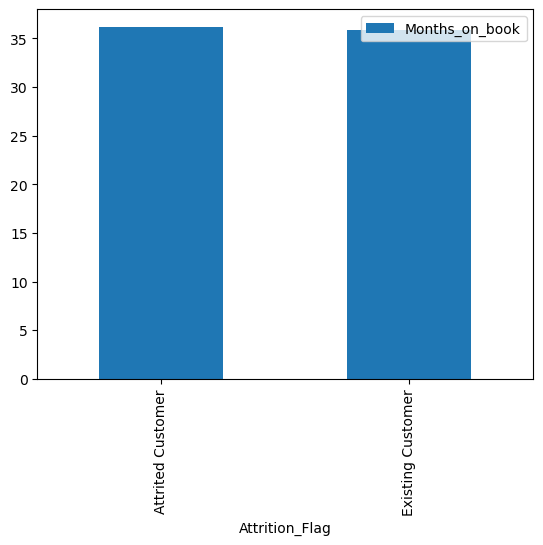

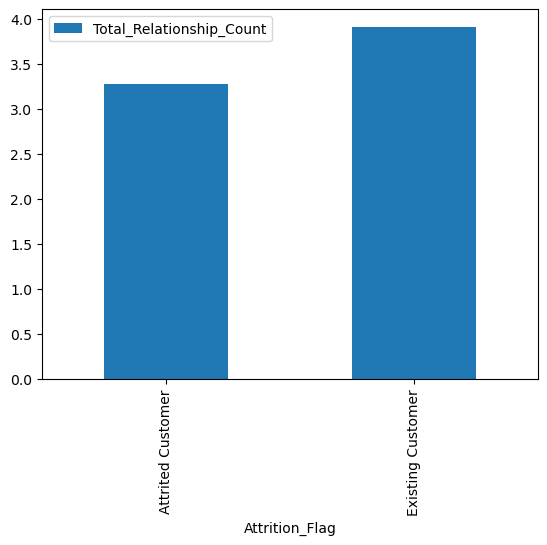

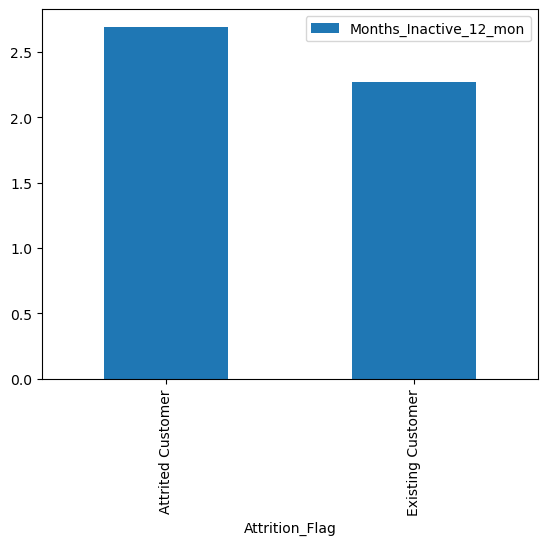

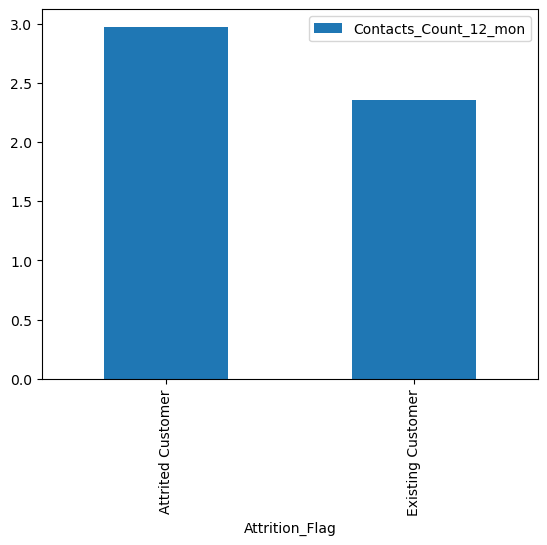

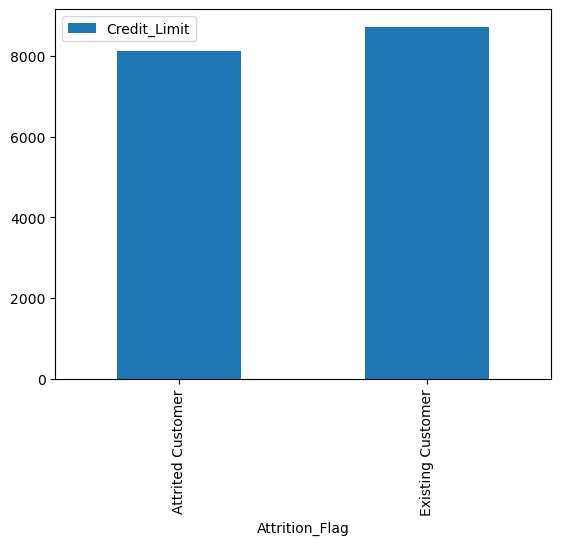

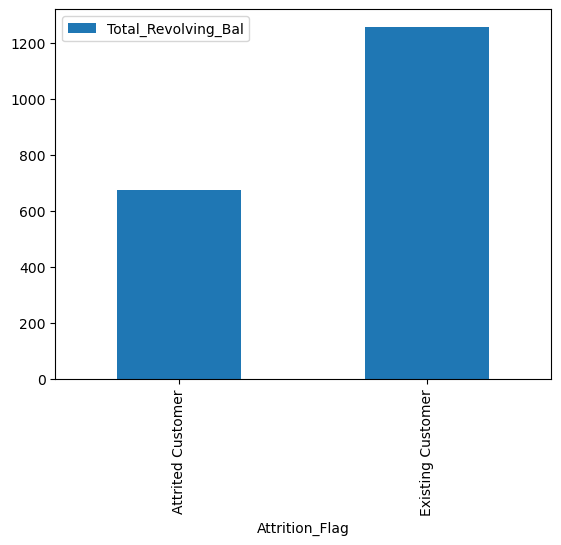

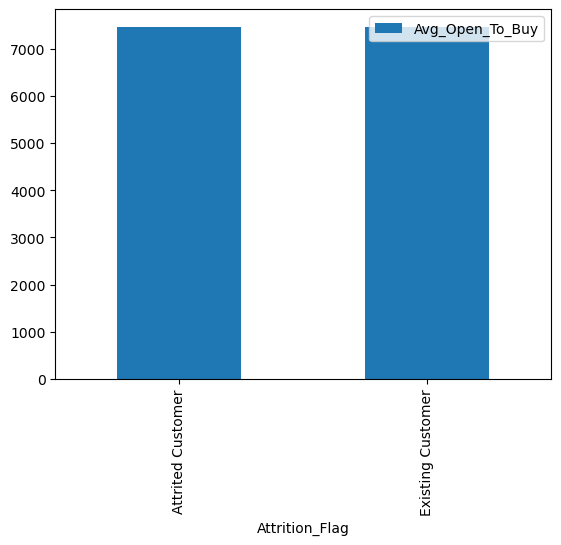

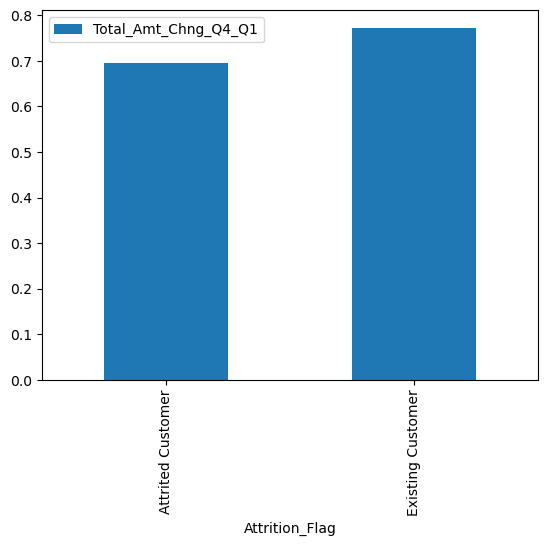

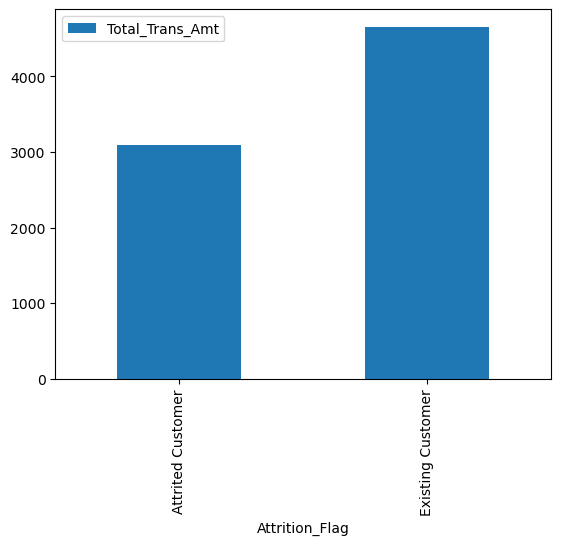

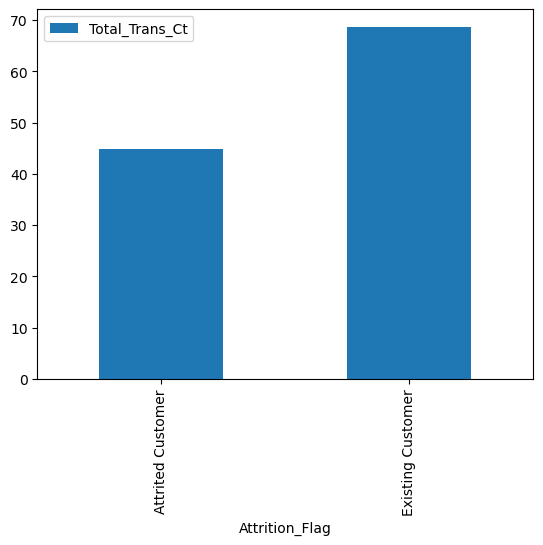

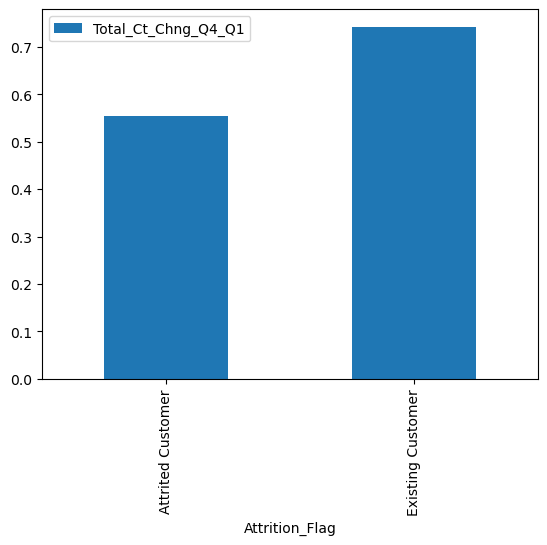

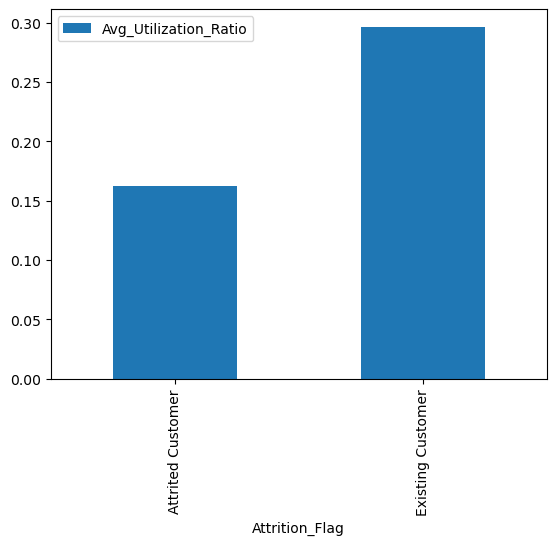

In [114]:
for i in numerical_cols:
    df.pivot_table(index= 'Attrition_Flag',
                  values= i,
                   aggfunc='mean').plot(kind='bar')

In [116]:
# we can remove first 3 cols as they don;t make any difference
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [117]:
df  =df.drop(['Customer_Age','Gender','Dependent_count','Months_on_book'],axis =1)

In [119]:
df.shape

(10127, 16)

In [120]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [123]:
df['Attrition_Flag']=df['Attrition_Flag'].map({'Attrited Customer':1,'Existing Customer':0})


In [125]:
df['Attrition_Flag'].unique()


array([0, 1], dtype=int64)

In [126]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
# club education level as Post-Graduate and Doctorate tohigher ed, else is lower ed  

In [127]:
df['Education_Level']= df['Education_Level'].apply(lambda x: 'Higher ed' if x in ['Post-Graduate','Doctorate'] else 'Lower ed')

In [128]:
df.head()

,Attrition_Flag,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,Lower ed,Married,$60K - $80K,Blue,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,Lower ed,Single,Less than $40K,Blue,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,Lower ed,Married,$80K - $120K,Blue,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,Lower ed,Unknown,Less than $40K,Blue,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,Lower ed,Married,$60K - $80K,Blue,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [132]:
#one hot ecoding
df = pd.get_dummies(df,drop_first = True)

In [139]:
#train test split
X= df.drop(['Attrition_Flag'],axis =1)

In [140]:
y=df['Attrition_Flag']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify =y, random_state=42)

In [142]:
X_train.shape

(7088, 23)

In [143]:
X_test.shape

(3039, 23)

In [144]:
y_train.shape

(7088,)

In [146]:
y_test.shape

(3039,)

In [150]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=101)

In [151]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=101)

In [152]:
rf_model.score(X_train,y_train)

1.0

In [153]:
#95% accuracy in test data
rf_model.score(X_test,y_test)

0.9503126028298783

In [154]:
from sklearn.metrics import classification_report

In [156]:
print(classification_report(y_train,rf_model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5949
           1       1.00      1.00      1.00      1139

    accuracy                           1.00      7088
   macro avg       1.00      1.00      1.00      7088
weighted avg       1.00      1.00      1.00      7088



In [157]:
#for test data set
print(classification_report(y_test,rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2551
           1       0.90      0.78      0.83       488

    accuracy                           0.95      3039
   macro avg       0.93      0.88      0.90      3039
weighted avg       0.95      0.95      0.95      3039



# Gradient boost Classifier

In [158]:
from sklearn.ensemble import GradientBoostingClassifier 
gb_model=GradientBoostingClassifier()

In [159]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [160]:
gb_model.score(X_train,y_train)

0.9737584650112867

In [161]:
gb_model.score(X_test,y_test)

0.9559065482066469

In [163]:
print(classification_report(y_train,gb_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5949
           1       0.95      0.88      0.92      1139

    accuracy                           0.97      7088
   macro avg       0.96      0.94      0.95      7088
weighted avg       0.97      0.97      0.97      7088



In [164]:
print(classification_report(y_test,gb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2551
           1       0.91      0.81      0.85       488

    accuracy                           0.96      3039
   macro avg       0.94      0.90      0.91      3039
weighted avg       0.95      0.96      0.95      3039



In [165]:
#compare both models and decide which is best model for  this

In [166]:
#here best model is gradient boost bcz in another model train accuracy is 100% which is sign of over fitting